In [1]:
import h5py
import numpy as np
with h5py.File('train_signs.h5','r') as f:
    print(list(f.keys()))
    X_train=np.array(f['train_set_x'])
    y_train=np.array(f['train_set_y'])
    class_names=list(f['list_classes'])
with h5py.File('test_signs.h5','r') as z:
    print(list(z.keys()))
    X_test=np.array(z['test_set_x'])
    y_test=np.array(z['test_set_y'])
    
print(class_names)
len(class_names)

['list_classes', 'train_set_x', 'train_set_y']
['list_classes', 'test_set_x', 'test_set_y']
[0, 1, 2, 3, 4, 5]


6

5


(1080, 64, 64, 3)

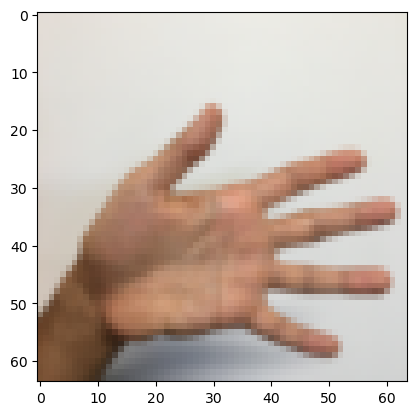

In [2]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])
print(y_train[0])
X_train.shape

In [3]:
import torch
from torch.utils.data import TensorDataset,DataLoader
X_train=torch.Tensor(X_train).permute(0,3,2,1)
X_train=X_train.type(torch.float)/255.
y_train=torch.Tensor(y_train).type(torch.LongTensor)
train_data=TensorDataset(X_train,y_train)


X_test=torch.Tensor(X_test).permute(0,3,2,1)
X_test=X_test.type(torch.float)/255.
y_test=torch.Tensor(y_test).type(torch.LongTensor)
test_data=TensorDataset(X_test,y_test)

device='cuda' if torch.cuda.is_available() else 'cpu'
X_test.shape

torch.Size([120, 3, 64, 64])

In [4]:
train_loader=DataLoader(dataset=train_data,batch_size=32,shuffle=True)
test_loader=DataLoader(dataset=test_data,batch_size=32)


In [5]:
from helper import model_builder
from helper import engine

model=model_builder.TinyVGG(3,50,len(class_names)).to(device)
x,y=next(iter(train_loader))
yhat=model(x.to(device))





In [6]:
loss_fn=torch.nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.001)
result=engine.train(model,train_loader,test_loader,optimizer,loss_fn,30,device)


  3%|▎         | 1/30 [00:01<00:45,  1.56s/it]

Epoch: 1 | train_loss: 1.7941 | train_acc: 0.1734 | test_loss: 1.7691 | test_acc: 0.1927


  7%|▋         | 2/30 [00:02<00:27,  1.03it/s]

Epoch: 2 | train_loss: 1.5965 | train_acc: 0.3401 | test_loss: 1.3241 | test_acc: 0.4922


 10%|█         | 3/30 [00:02<00:21,  1.28it/s]

Epoch: 3 | train_loss: 1.0817 | train_acc: 0.6134 | test_loss: 0.9166 | test_acc: 0.7214


 13%|█▎        | 4/30 [00:03<00:17,  1.46it/s]

Epoch: 4 | train_loss: 0.7471 | train_acc: 0.7589 | test_loss: 0.5543 | test_acc: 0.8307


 17%|█▋        | 5/30 [00:03<00:15,  1.59it/s]

Epoch: 5 | train_loss: 0.5650 | train_acc: 0.8064 | test_loss: 0.6211 | test_acc: 0.7708


 20%|██        | 6/30 [00:04<00:14,  1.68it/s]

Epoch: 6 | train_loss: 0.4579 | train_acc: 0.8428 | test_loss: 0.5861 | test_acc: 0.7865


 23%|██▎       | 7/30 [00:04<00:13,  1.74it/s]

Epoch: 7 | train_loss: 0.3373 | train_acc: 0.8744 | test_loss: 0.4545 | test_acc: 0.8073


 27%|██▋       | 8/30 [00:05<00:12,  1.78it/s]

Epoch: 8 | train_loss: 0.2354 | train_acc: 0.9188 | test_loss: 0.3264 | test_acc: 0.8490


 30%|███       | 9/30 [00:05<00:11,  1.81it/s]

Epoch: 9 | train_loss: 0.2572 | train_acc: 0.9084 | test_loss: 0.3740 | test_acc: 0.8594


 33%|███▎      | 10/30 [00:06<00:10,  1.84it/s]

Epoch: 10 | train_loss: 0.1773 | train_acc: 0.9403 | test_loss: 0.3356 | test_acc: 0.8828


 37%|███▋      | 11/30 [00:06<00:10,  1.85it/s]

Epoch: 11 | train_loss: 0.1660 | train_acc: 0.9357 | test_loss: 0.3305 | test_acc: 0.8568


 40%|████      | 12/30 [00:07<00:09,  1.86it/s]

Epoch: 12 | train_loss: 0.1605 | train_acc: 0.9442 | test_loss: 0.3053 | test_acc: 0.8594


 43%|████▎     | 13/30 [00:07<00:09,  1.88it/s]

Epoch: 13 | train_loss: 0.1421 | train_acc: 0.9436 | test_loss: 0.3549 | test_acc: 0.8542


 47%|████▋     | 14/30 [00:08<00:08,  1.88it/s]

Epoch: 14 | train_loss: 0.1086 | train_acc: 0.9605 | test_loss: 0.3170 | test_acc: 0.8620


 50%|█████     | 15/30 [00:09<00:07,  1.88it/s]

Epoch: 15 | train_loss: 0.0550 | train_acc: 0.9816 | test_loss: 0.3658 | test_acc: 0.8516


 53%|█████▎    | 16/30 [00:09<00:07,  1.86it/s]

Epoch: 16 | train_loss: 0.0403 | train_acc: 0.9908 | test_loss: 0.3148 | test_acc: 0.8906


 57%|█████▋    | 17/30 [00:10<00:07,  1.83it/s]

Epoch: 17 | train_loss: 0.0243 | train_acc: 0.9963 | test_loss: 0.3100 | test_acc: 0.9036


 60%|██████    | 18/30 [00:10<00:06,  1.82it/s]

Epoch: 18 | train_loss: 0.0139 | train_acc: 0.9982 | test_loss: 0.3117 | test_acc: 0.9036


 63%|██████▎   | 19/30 [00:11<00:05,  1.83it/s]

Epoch: 19 | train_loss: 0.0641 | train_acc: 0.9795 | test_loss: 0.5808 | test_acc: 0.8438


 67%|██████▋   | 20/30 [00:11<00:05,  1.80it/s]

Epoch: 20 | train_loss: 0.0494 | train_acc: 0.9844 | test_loss: 0.2624 | test_acc: 0.9010


 70%|███████   | 21/30 [00:12<00:04,  1.81it/s]

Epoch: 21 | train_loss: 0.0111 | train_acc: 0.9982 | test_loss: 0.2667 | test_acc: 0.9115


 73%|███████▎  | 22/30 [00:12<00:04,  1.84it/s]

Epoch: 22 | train_loss: 0.0030 | train_acc: 1.0000 | test_loss: 0.2710 | test_acc: 0.9062


 77%|███████▋  | 23/30 [00:13<00:03,  1.86it/s]

Epoch: 23 | train_loss: 0.0015 | train_acc: 1.0000 | test_loss: 0.2825 | test_acc: 0.9141


 80%|████████  | 24/30 [00:13<00:03,  1.88it/s]

Epoch: 24 | train_loss: 0.0013 | train_acc: 1.0000 | test_loss: 0.2766 | test_acc: 0.9245


 83%|████████▎ | 25/30 [00:14<00:02,  1.89it/s]

Epoch: 25 | train_loss: 0.0011 | train_acc: 1.0000 | test_loss: 0.3280 | test_acc: 0.8880


 87%|████████▋ | 26/30 [00:15<00:02,  1.87it/s]

Epoch: 26 | train_loss: 0.0007 | train_acc: 1.0000 | test_loss: 0.3096 | test_acc: 0.9141


 90%|█████████ | 27/30 [00:15<00:01,  1.88it/s]

Epoch: 27 | train_loss: 0.0006 | train_acc: 1.0000 | test_loss: 0.3478 | test_acc: 0.8906


 93%|█████████▎| 28/30 [00:16<00:01,  1.86it/s]

Epoch: 28 | train_loss: 0.0005 | train_acc: 1.0000 | test_loss: 0.3410 | test_acc: 0.9089


 97%|█████████▋| 29/30 [00:16<00:00,  1.83it/s]

Epoch: 29 | train_loss: 0.0005 | train_acc: 1.0000 | test_loss: 0.3525 | test_acc: 0.9089


100%|██████████| 30/30 [00:17<00:00,  1.74it/s]

Epoch: 30 | train_loss: 0.0004 | train_acc: 1.0000 | test_loss: 0.3495 | test_acc: 0.8984


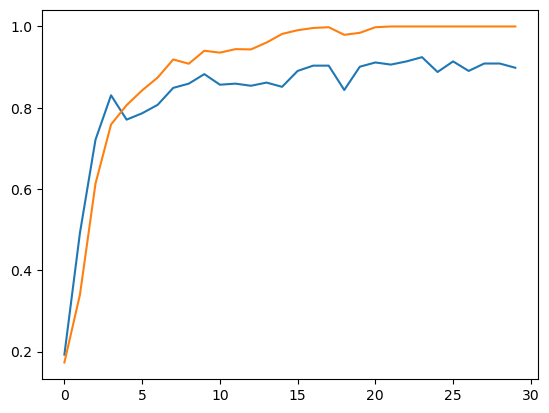

In [8]:
plt.plot(result['test_acc'])
plt.plot(result['train_acc'])
plt.show()

In [14]:
import torchvision
from PIL import Image
from torchvision import transforms
img_path='test4.jpg'
img_=torchvision.io.read_image(str(img_path)).type(torch.float)
transform=transforms.Resize(size=(64,64))
img=transform(img_).to(device)/255
y_t=model(img.unsqueeze(dim=0))



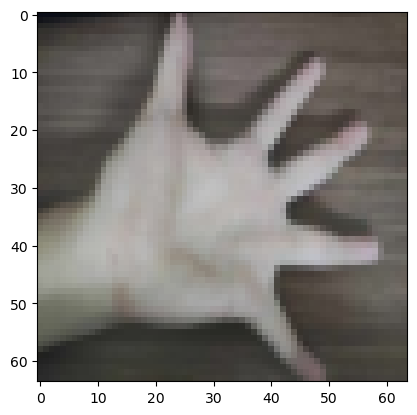

5


In [15]:
plt.imshow(img.to('cpu').permute(1,2,0))
plt.show()
label=class_names[y_t.argmax()]
print(label)

In [18]:
from helper import utils
utils.save_model(model,target_dir="models",model_name='finger_prediction.pth')


[INFO] Saving model to: models\finger_prediction.pth
